In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist, cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from PIL import Image

# Task 1: Image Compression

def compress_image(input_path, output_path, quality=50):
    img = Image.open(input_path)
    img.save(output_path, "JPEG", quality=quality)
    print(f"Image compressed and saved as {output_path}")

def compress_png(input_path, output_path):
    img = Image.open(input_path)
    img.save(output_path, "PNG")
    print(f"PNG compressed image saved as {output_path}")

In [ ]:
# Task 2: CNN Implementation
def preprocess_data(dataset):
    (X_train, y_train), (X_test, y_test) = dataset.load_data()
    X_train, X_test = X_train / 255.0, X_test / 255.0
    y_train, y_test = to_categorical(y_train), to_categorical(y_test)
    return (X_train, y_train), (X_test, y_test)

# Define CNN Model
def build_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Train and Evaluate CNN
def train_evaluate_cnn(dataset, input_shape, num_classes):
    (X_train, y_train), (X_test, y_test) = preprocess_data(dataset)
    model = build_cnn(input_shape, num_classes)
    history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    print("Classification Report:")
    print(classification_report(y_true, y_pred_classes))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred_classes))

    fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred.ravel())
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()


Image compressed and saved as compressed.jpg
PNG compressed image saved as compressed.png
Training CNN on MNIST...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.8704 - loss: 0.4104 - val_accuracy: 0.9859 - val_loss: 0.0424
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9770 - loss: 0.0779 - val_accuracy: 0.9900 - val_loss: 0.0311
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9840 - loss: 0.0552 - val_accuracy: 0.9901 - val_loss: 0.0280
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9864 - loss: 0.0433 - val_accuracy: 0.9920 - val_loss: 0.0234
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9885 - loss: 0.0364 - val_accuracy: 0.9931 - val_loss: 0.0219
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
   

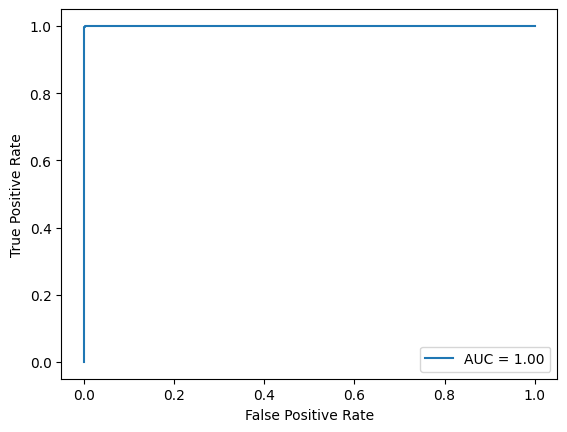

Training CNN on CIFAR-10...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.3101 - loss: 1.8525 - val_accuracy: 0.5222 - val_loss: 1.3770
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.4996 - loss: 1.3870 - val_accuracy: 0.6006 - val_loss: 1.1562
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.5679 - loss: 1.2292 - val_accuracy: 0.6365 - val_loss: 1.0580
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.5970 - loss: 1.1443 - val_accuracy: 0.6449 - val_loss: 1.0111
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.6157 - loss: 1.0798 - val_accuracy: 0.6681 - val_loss: 0.9497
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1000
           1       0.84      0.74      0.79      1000
           2       0.61      0.44      0.51      1000
           3       0.47      0.49      0.48      1000
         

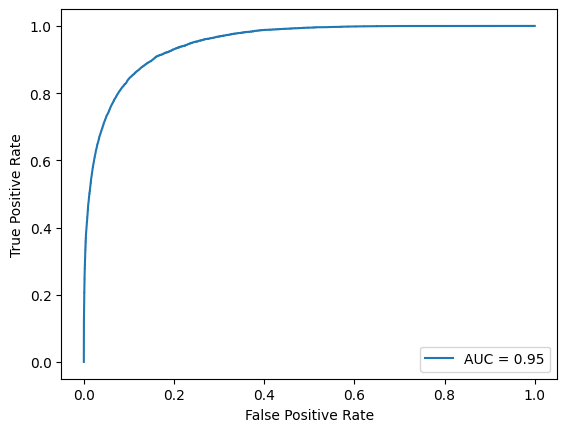

In [ ]:
# Run Image Compression
def main():
    compress_image('Flower.jpg', 'compressed.jpg', quality=50)
    compress_png('Flower.jpg', 'compressed.png')

    # CNN Training on MNIST
    print("Training CNN on MNIST...")
    train_evaluate_cnn(mnist, (28, 28, 1), 10)

    # CNN Training on CIFAR-10
    print("Training CNN on CIFAR-10...")
    train_evaluate_cnn(cifar10, (32, 32, 3), 10)

if __name__ == "__main__":
    main()